## 파일명 : batter_RobustScaler.ipynb
- RobustScaler로 표준화 후 상관계수 구하기

In [0]:
import pandas as pd

In [0]:
b_no_scale = pd.read_csv('../Data/MLB_data_edit/b_total_no_scale.csv')

In [0]:
b_no_scale

,Unnamed: 0,R,TH,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,PCT
0,0,34.400000,65.350000,40.200000,14.550000,1.700000,8.900000,33.250000,4.250000,2.050000,28.750000,70.300000,0.800000,1.900000,1.850000,0.234700,0.308250,0.380750,0.689000,0.599
1,1,33.333333,63.952381,42.238095,14.047619,1.142857,6.523810,32.095238,2.904762,1.333333,28.428571,46.714286,1.523810,1.619048,2.285714,0.227238,0.346238,0.377143,0.723381,0.593
2,2,27.863636,65.409091,46.409091,12.000000,0.954545,6.045455,26.227273,3.454545,1.545455,19.227273,47.636364,1.409091,2.045455,2.454545,0.237455,0.285273,0.345000,0.630273,0.586
3,3,27.233333,50.200000,30.533333,11.900000,0.733333,7.033333,26.000000,2.266667,0.566667,19.500000,37.833333,0.800000,1.500000,1.566667,0.212200,0.274267,0.347033,0.621300,0.580
4,4,31.952381,65.428571,43.142857,13.952381,1.285714,7.047619,30.428571,2.619048,1.476190,22.190476,52.904762,0.761905,1.761905,2.333333,0.252381,0.322190,0.380048,0.702238,0.568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,35.619048,61.809524,39.333333,11.333333,1.142857,10.000000,33.380952,5.476190,1.333333,26.428571,61.714286,0.428571,1.761905,3.571429,0.233810,0.304381,0.388571,0.692952,0.414
296,296,29.500000,54.769231,34.153846,11.192308,1.115385,8.307692,28.000000,3.615385,1.423077,20.807692,56.961538,0.307692,1.307692,2.807692,0.236462,0.293769,0.393846,0.687615,0.364
297,297,42.631579,72.263158,43.684211,15.578947,1.263158,11.736842,40.263158,6.894737,2.000000,28.000000,82.315789,0.842105,2.315789,3.526316,0.237842,0.306947,0.410684,0.717632,0.352
298,298,30.166667,54.041667,31.625000,11.250000,0.875000,10.291667,29.041667,2.125000,0.833333,21.166667,62.666667,0.583333,1.166667,1.875000,0.207583,0.266583,0.364167,0.630750,0.333


In [0]:
del b_no_scale['Unnamed: 0']

In [0]:
from sklearn.preprocessing import RobustScaler
RobustScaler = RobustScaler()
from sklearn import preprocessing

In [0]:
# 표준화 작업
col = ['R', 'TH', 'H', '2B', '3B', 'HR','RBI','SB','CS','BB','SO','SH','SF','HBP','AVG','OBP','SLG','OPS','PCT']
x=b_no_scale[col].values
RobustScaler = preprocessing.RobustScaler()
x_scaled = RobustScaler.fit_transform(x)

In [0]:
x_scaled

array([[ 0.54224806,  0.37842421,  0.06359074, ...,  0.37216434,
         0.44696814,  0.88      ],
       [ 0.39268583,  0.25804285,  0.33571472, ...,  0.29403647,
         0.9506433 ,  0.82666667],
       [-0.37424549,  0.3835139 ,  0.89262095, ..., -0.4021525 ,
        -0.41337651,  0.76444444],
       ...,
       [ 1.69643552,  0.97387641,  0.52879826, ...,  1.02051577,
         0.86641595, -1.31555556],
       [-0.05132704, -0.59559839, -1.08133277, ...,  0.0129824 ,
        -0.40638455, -1.48444444],
       [ 1.41424926,  0.56976289,  0.20219594, ...,  0.6364583 ,
         0.58858318, -1.84888889]])

In [0]:
bat_scaled = pd.DataFrame(x_scaled, columns=col, index=b_no_scale.index)

In [0]:
bat_scaled

,R,TH,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,PCT
0,0.542248,0.378424,0.063591,1.081568,0.836653,0.545003,0.579870,0.292032,0.951913,1.323781,1.662968,-0.275916,0.277564,-0.491764,0.145511,0.442261,0.372164,0.446968,0.880000
1,0.392686,0.258043,0.335715,0.868486,-0.095618,-0.356261,0.414904,-0.433234,-0.241296,1.263819,-0.464911,0.722638,-0.242317,-0.027240,-0.188812,1.899384,0.294036,0.950643,0.826667
2,-0.374245,0.383514,0.892621,0.000000,-0.410721,-0.537696,-0.423377,-0.136826,0.111874,-0.452675,-0.381722,0.564374,0.546716,0.152754,0.268926,-0.439087,-0.402153,-0.413377,0.764444
3,-0.462623,-0.926493,-1.227091,-0.042414,-0.780876,-0.163004,-0.455844,-0.777255,-1.517752,-0.401798,-1.266142,-0.275916,-0.462606,-0.793831,-0.862579,-0.861251,-0.358112,-0.544825,0.711111
4,0.199056,0.385192,0.456517,0.828091,0.143426,-0.157586,0.176809,-0.587273,-0.003447,0.100108,0.093588,-0.328472,0.022029,0.023528,0.937689,0.976981,0.356951,0.640904,0.604444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.713176,0.073472,-0.052126,-0.282763,-0.095618,0.962222,0.598578,0.953116,-0.241296,0.890721,0.888374,-0.788332,0.022029,1.343486,0.105614,0.293854,0.541570,0.504870,-0.764444
296,-0.144803,-0.532931,-0.743684,-0.342578,-0.141587,0.320347,-0.170130,-0.050112,-0.091878,-0.157849,0.459586,-0.955095,-0.818457,0.529251,0.224435,-0.113184,0.655817,0.426684,-1.208889
297,1.696436,0.973876,0.528798,1.517990,0.105683,1.620988,1.581750,1.717905,0.868666,1.183869,2.747021,-0.217829,1.046950,1.295390,0.286290,0.392295,1.020516,0.866416,-1.315556
298,-0.051327,-0.595598,-1.081333,-0.318108,-0.543825,1.072848,-0.021320,-0.853632,-1.073768,-0.090883,0.974297,-0.574825,-1.079414,-0.465111,-1.069424,-1.155963,0.012982,-0.406385,-1.484444


In [0]:
bat_scaled.to_csv('../Data/MLB_data_edit/b_total_RBS.csv')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
col = ['R', 'TH', 'H', '2B', '3B', 'HR','RBI','SB','CS','BB','SO','SH','SF','HBP','AVG','OBP','SLG','OPS']
R=np.corrcoef(bat_scaled['R'],bat_scaled['PCT'])
TH=np.corrcoef(bat_scaled['TH'],bat_scaled['PCT'])
H=np.corrcoef(bat_scaled['H'],bat_scaled['PCT'])
B2=np.corrcoef(bat_scaled['2B'],bat_scaled['PCT'])
B3=np.corrcoef(bat_scaled['3B'],bat_scaled['PCT'])
HR=np.corrcoef(bat_scaled['HR'],bat_scaled['PCT'])
RBI=np.corrcoef(bat_scaled['RBI'],bat_scaled['PCT'])
SB=np.corrcoef(bat_scaled['SB'],bat_scaled['PCT'])
CS=np.corrcoef(bat_scaled['CS'],bat_scaled['PCT'])
BB=np.corrcoef(bat_scaled['BB'],bat_scaled['PCT'])
SO=np.corrcoef(bat_scaled['SO'],bat_scaled['PCT'])
SH=np.corrcoef(bat_scaled['SH'],bat_scaled['PCT'])
SF=np.corrcoef(bat_scaled['SF'],bat_scaled['PCT'])
HBP=np.corrcoef(bat_scaled['HBP'],bat_scaled['PCT'])
AVG=np.corrcoef(bat_scaled['AVG'],bat_scaled['PCT'])
OBP=np.corrcoef(bat_scaled['OBP'],bat_scaled['PCT'])
SLG=np.corrcoef(bat_scaled['SLG'],bat_scaled['PCT'])
OPS=np.corrcoef(bat_scaled['OPS'],bat_scaled['PCT'])

In [0]:
hitmap = pd.DataFrame({
    'R':R[1][0],
    'TH':TH[1][0],
    'H':H[1][0],
    '2B':B2[1][0],
    '3B':B3[1][0],
    'HR':HR[1][0],
    'RBI':RBI[1][0],
    'SB':SB[1][0],
    'CS':CS[1][0],
    'BB':BB[1][0],
    'SO':SO[1][0],
    'SH':SH[1][0],
    'SF':SF[1][0],
    'HBP':HBP[1][0],
    'AVG':AVG[1][0],
    'OBP':OBP[1][0],
    'SLG':SLG[1][0],
    'OPS':OPS[1][0],
    
},index=['corrcoef'])

In [0]:
hitmap

,R,TH,H,2B,3B,HR,RBI,SB,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
corrcoef,0.057705,0.113008,0.112155,0.122016,0.093762,0.012282,0.060167,-0.068374,-0.046446,-0.016945,0.032993,-0.052372,-0.046472,-0.042926,0.123927,0.068073,0.057308,0.066068


In [0]:
hitmap=np.abs(hitmap)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

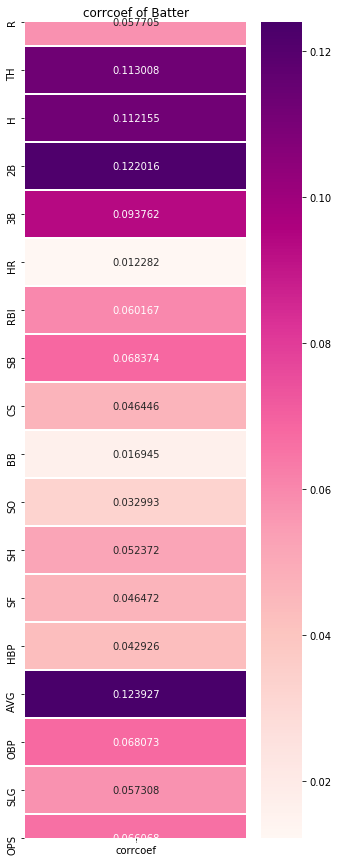

In [0]:
plt.figure(figsize=(5,15))
sns.heatmap(hitmap[col].T,annot=True, fmt='f', linewidths=1, cmap='RdPu')
plt.title('corrcoef of Batter')
plt.show()